#  <span style="color:orange">Binary Classification Tutorial (CLF102) - Level Intermediate</span>

**Date Updated: May 02, 2020**

# 1.0 Tutorial Objective
Welcome to the Binary Classification Tutorial (CLF102) - Level Intermediate. This tutorial assumes that you have completed __[Binary Classification Tutorial (CLF101) - Level Beginner](https://github.com/pycaret/pycaret/blob/master/Tutorials/Binary%20Classification%20Tutorial%20Level%20Beginner%20-%20%20CLF101.ipynb)__. If you haven't used PyCaret before and this is your first tutorial, we strongly recommend you to go back and progress through the beginner tutorial to understand the basics of working in PyCaret.

In this tutorial we will use the `pycaret.classification` module to learn:

* **Normalization:**  How to normalize and scale the dataset
* **Transformation:**  How to apply transformations that make the data linear and approximately normal
* **Ignore Low Variance:**  How to remove features with statistically insignificant variances to make the experiment more efficient
* **Remove Multi-collinearity:**  How to remove multi-collinearity from the dataset to boost performance of Linear algorithms
* **Group Features:**  How to extract statistical information from related features in the dataset
* **Bin Numeric Variables:**  How to bin numeric variables and transform numeric features into categorical ones using 'sturges' rule
* **Model Ensembling and Stacking:**  How to boost model performance using several ensembling techniques such as Bagging, Boosting, Soft/Hard Voting and Generalized Stacking
* **Tuning Hyperparameters of Ensemblers:**  How to tune hyperparameters of ensemblers 
* **Model Calibration:**  How to calibrate probabilities of a classification model
* **Save / Load Experiment:**  How to save the entire experiment

Read Time : Approx 60 Minutes


## 1.1 Installing PyCaret
If you haven't installed PyCaret yet, please follow the link to __[Beginner's Tutorial](https://github.com/pycaret/pycaret/blob/master/Tutorials/Binary%20Classification%20Tutorial%20Level%20Beginner%20-%20%20CLF101.ipynb)__ for instructions on how to install.

## 1.2 Pre-Requisites
- Python 3.x
- Latest version of PyCaret
- Internet connection to load data from PyCaret's repository
- Completion of Binary Classification Tutorial (CLF101) - Level Beginner

## 1.3 For Google Colab Users:
If you are running this notebook on Google Colab, run the following code at the top of your notebook to display interactive visuals.<br/>
<br/>
`from pycaret.utils import enable_colab` <br/>
`enable_colab()`

## 1.4 See Also:
- __[Binary Classification Tutorial (CLF101) - Level Beginner](https://github.com/pycaret/pycaret/blob/master/Tutorials/Binary%20Classification%20Tutorial%20Level%20Beginner%20-%20%20CLF101.ipynb)__
- __[Binary Classification Tutorial (CLF103) - Level Expert](https://github.com/pycaret/pycaret/blob/master/Tutorials/Binary%20Classification%20Tutorial%20Level%20Expert%20-%20CLF103.ipynb)__

# 2.0 Brief Overview of Techniques Covered in This Tutorial
Before we get into the practical execution of the techniques mentioned above in the Section 1, it is important to understand what these techniques are and when to use them. More often than not most of these techniques will help linear and parametric algorithms, however it is not suprising to also see performance gains in tree-based models. The below explanations are only brief and we recommend that you to do extra reading to dive deeper and get a more thorough understanding of these techniques.

- **Normalization:** Normalization / Scaling (often used interchangeably with standardization) is used to transform the actual values of numeric variables in a way that provides helpful properties for machine learning. Many algorithms such as Logistic Regression, Support Vector Machine, K Nearest Neighbors and Naive Bayes assume that all features are centered around zero and have variances that are at the same level of order. If a particular feature in a dataset has a variance that is larger in the order of magnitude than other features, the model may not understand all features correctly and could perform poorly. For instance, in the dataset we are using for this example the `AGE` feature ranges between 21 to 79 while other numeric features range from 10,000 to 1,000,000. __[Read more](https://sebastianraschka.com/Articles/2014_about_feature_scaling.html#z-score-standardization-or-min-max-scaling)__ <br/>
<br/>
- **Transformation:** While normalization transforms the range of data to remove the impact of magnitude in variance, transformation is a more radical technique as it changes the shape of the distribution so that transformed data can be represented by a normal or approximately normal distirbution. In general, you should transform the data if using algorithms that assume normality or a Gaussian distribution. Examples of such models are Logistic Regression, Linear Discriminant Analysis (LDA) and Gaussian Naive Bayes. (Pro tip: any method with “Gaussian” in the name probably assumes normality.) __[Read more](https://en.wikipedia.org/wiki/Power_transform)__<br/>
<br/>
- **Ignore Low Variance:** Datasets can sometimes contain categorical features that have a single unique or a small number of values across samples. This kind of features are not only non-informative and add no value but are also sometimes harmful for a few algorithms. Imagine a feature with only one unique value or a few dominant unique values accross samples, they can be removed from the dataset by using the ignore low variance feature in PyCaret. <br/>
<br/>
- **Multi-collinearity:** Multi-collinearity is a state of very high intercorrelations or inter-associations among the independent features in the dataset. It is a type of disturbance in the data that is not handled well by machine learning models (mostly linear algorithms). Multi-collinearity may reduce overall coefficient of the model and cause unpredictable variance. This will lead to overfitting where the model may do great on a known training set but will fail with an unknown test set. __[Read more](https://towardsdatascience.com/multicollinearity-in-data-science-c5f6c0fe6edf)__<br/>
<br/>
- **Group Features:** Sometimes datasets may contain features that are related at a sample level. For example in the `credit` dataset there are features called `BILL_AMT1 .. BILL_AMT6` which are related in such a way that `BILL_AMT1` is the amount of the bill 1 month ago and `BILL_AMT6` is the amount of the bill 6 months ago. Such features can be used to extract additional features based on the statistical properties of the distribution such as mean, median, variance, standard deviation etc. <br/>
<br/>
- **Bin Numeric Variables:** Binning or discretization is the process of transforming numerical variables into categorical features. An example would be the Age variable which is a continious distribution of numeric values that can be discretized into intervals (10-20 years, 21-30 etc.). Binning may improve the accuracy of a predictive model by reducing the noise or non-linearity in the data. PyCaret automatically determines the number and size of bins using Sturges rule.  __[Read more](https://www.vosesoftware.com/riskwiki/Sturgesrule.php)__<br/>
<br/>
- **Model Ensembling and Stacking:** Ensemble modeling is a process where multiple diverse models are created to predict the outcome. This is achieved either by using many different modeling algorithms or using different samples of training data sets. The ensemble model then aggregates the predictions of each base model resulting in one final prediction for the unseen data. The motivation for using ensemble models is to reduce the generalization error of the prediction. As long as the base models are diverse and independent, the prediction error of the model decreases when the ensemble approach is used. The two most common methods in ensemble learning are `Bagging` and `Boosting`. Stacking is also a type of ensemble learning where predictions from multiple models are used as input features for a meta model that predicts the final outcome. __[Read more](https://blog.statsbot.co/ensemble-learning-d1dcd548e936)__<br/>
<br/>
- **Tuning Hyperparameters of Ensemblers:** Similar to hyperparameter tuning for a single machine learning model, we will also learn how to tune hyperparameters for an ensemble model.

# 3.0 Dataset for the Tutorial

For this tutorial we will be using the same dataset that was used in __[Binary Classification Tutorial (CLF101) - Level Beginner](https://github.com/pycaret/pycaret/blob/master/Tutorials/Binary%20Classification%20Tutorial%20Level%20Beginner%20-%20%20CLF101.ipynb)__

#### Dataset Acknowledgements:
Lichman, M. (2013). UCI Machine Learning Repository. Irvine, CA: University of California, School of Information and Computer Science.

The original dataset and data dictionary can be __[found here](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)__ at the UCI Machine Learning Repository.

# 4.0 Getting the Data

You can download the data from the original source __[found here](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)__ and load it using the pandas read_csv function or you can use PyCaret's data repository to load the data using the get_data function (This will require an internet connection).

In [1]:
from pycaret.datasets import get_data
dataset = get_data('credit', profile=True)

Notice that when the `profile` parameter is set to `True`, it displays a data profile for exploratory data analysis. Several pre-processing steps, as discussed in section 2 above, will be performed in this experiment based on this analysis. Let's summarize how the profile has helped to make critical pre-processing choices with the data.

- **Missing Values:** There are no missing values in the data. However, we still need imputers in our pipeline just in case the new unseen data has missing values (not applicable in this case). When you execute the `setup()` function, imputers are created and stored in the pipeline automatically. By default, it uses a mean imputer for numeric values and a constant imputer for categorical. This can be changed using the `numeric_imputation` and `categorical_imputation` parameters in `setup()`. <br/>
<br/>
- **Multicollinearity:** There are high correlations between `BILL_AMT1 ... BIL_AMT6` which introduces multicollinearity into the data. We will remove multi-collinearity by using the `remove_multicollinearity` and `multicollinearity_threshold` parameters in setup. <br/>
<br/>
- **Data Scale / Range:** Notice how the scale / range of numeric features are different. For example the `AGE` feature ranges from between 21 to 79 and `BILL_AMT1` ranges from -165,580 to 964,511. This may cause problems for algorithms that assume all features have a variance within the same order. In this case, the order of magnitude for `BILL_AMT1` is widely different than `AGE`. We will deal with this problem by using the `normalize` parameter in setup. <br/>
<br/>
- **Distribution of Feature Space:** Numeric features are not normally distributed. Look at the distributions of `LIMIT_BAL`, `BILL_AMT1` and `PAY_AMT1 ... PAY_AMT6`. A few features are also highly skewed such as `PAY_AMT1`. This may cause problems for algorithms that assume normal or approximately normal distributions of the data. Examples include Logistic Regression, Linear Discriminant Analysis (LDA) and Naive Bayes.  We will deal with this problem by using the `transformation` parameter in setup. <br/>
<br/>
- **Group Features:** From the data description we know that certain features are related with each other such as `BILL_AMT1 ... BILL_AMT6` and `PAY_AMT1 ... PAY_AMT6`. We will use the `group_features` parameter in the setup to extract statistical information from these features.  <br/>
<br/>
- **Bin Numeric Features:** When looking at the correlations between the numeric features and the target variable, we observe that `AGE` and `LIMIT_BAL` are weak. We will use the `bin_numeric_features` parameter to remove the noise from these variables which may help the linear algorithms. <br/>

In [2]:
#check the shape of data
dataset.shape

(24000, 24)

In order to demonstrate the `predict_model()` function on unseen data, a sample of 1200 rows has been withheld from the original dataset to be used for predictions. This should not be confused with the train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 1200 records were not available at the time when the machine learning experiment was performed.

In [3]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index).reset_index(drop=True)
data.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions ' + str(data_unseen.shape))

Data for Modeling: (22800, 24)
Unseen Data For Predictions (1200, 24)


# 5.0 Setting Up Environment in PyCaret

In the previous tutorial __[Binary Classification (CLF101) - Level Beginner](https://github.com/pycaret/pycaret/blob/master/Tutorials/Binary%20Classification%20Tutorial%20Level%20Beginner%20-%20%20CLF101.ipynb)__ we learned how to initialize the environment in PyCaret using `setup()`. No additional parameters were passed in our last example as we did not perform any pre-processing steps (other than those that are imperative for machine learning experiments which were performed automatically by PyCaret). In this example we will take it to the next level by customizing the pre-processing pipeline using `setup()`. Let's look at how to implement all the steps discussed in the section 4 above.

In [4]:
from pycaret.classification import *

In [5]:
exp_clf102 = setup(data = data, target = 'default', session_id=123,
                  normalize = True, 
                  transformation = True, 
                  ignore_low_variance = True,
                  remove_multicollinearity = True, multicollinearity_threshold = 0.95,
                  bin_numeric_features = ['LIMIT_BAL', 'AGE'],
                  group_features = [['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'],
                                   ['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]) 

 
Setup Succesfully Completed!


Note that this is the same setup grid that was shown in __[Binary Classification Tutorial (CLF101) - Level Beginner](https://github.com/pycaret/pycaret/blob/master/Tutorials/Binary%20Classification%20Tutorial%20Level%20Beginner%20-%20%20CLF101.ipynb)__. The only difference here is that the customization parameters that were passed to `setup()` are now set to `True`. Also notice that the `session_id` is the same as the one used in the beginner tutorial, which means that the effect of randomization is completely isolated. Any improvements we see in this experiment are solely due to the pre-processing steps taken in `setup()` or any other modeling techniques used in the later sections of this tutorial.

# 6.0 Comparing All Models

Similar to __[Binary Classification Tutorial (CLF101) - Level Beginner](https://github.com/pycaret/pycaret/blob/master/Tutorials/Binary%20Classification%20Tutorial%20Level%20Beginner%20-%20%20CLF101.ipynb)__ we will also begin this tutorial with `compare_models()`. We will then compare the below results with the last experiment.

In [6]:
compare_models()

For the purposes of comparison we will use the `AUC` score. Notice how drastically a few of the algorithms have improved after we performed the pre-processing in `setup()`. 
- Logistic Regression AUC improved from `0.6508` to `0.7803`
- Naives Bayes AUC improved from `0.6457` to `0.7535`
- K Nearest Neighbors AUC improved from `0.6099` to `0.7003`

To see results for all of the models from the previous tutorial refer to Section 7 in __[Binary Classification Tutorial (CLF101) - Level Beginner](https://github.com/pycaret/pycaret/blob/master/Tutorials/Binary%20Classification%20Tutorial%20Level%20Beginner%20-%20%20CLF101.ipynb)__.

# 7.0 Create a Model

In the previous tutorial __[Binary Classification (CLF101) - Level Beginner](https://github.com/pycaret/pycaret/blob/master/Tutorials/Binary%20Classification%20Tutorial%20Level%20Beginner%20-%20%20CLF101.ipynb)__ we learned how to create a model using the `create_model()` function. Now we will learn about a few other parameters that may come in handy. In this section, we will create all models using 5 fold stratified cross validation. Notice how the `fold` parameter is passed inside `create_model()` to achieve this.

### 7.1 Create Model (change fold to 5)

In [7]:
dt = create_model('dt', fold = 5)

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.7268  0.6214  0.4278  0.3922  0.4092  0.2320
1       0.7409  0.6268  0.4193  0.4151  0.4172  0.2506
2       0.7287  0.6188  0.4207  0.3939  0.4068  0.2312
3       0.7412  0.6255  0.4178  0.4155  0.4167  0.2504
4       0.7283  0.6271  0.4448  0.3980  0.4201  0.2434
Mean    0.7332  0.6239  0.4261  0.4029  0.4140  0.2415
SD      0.0065  0.0033  0.0100  0.0103  0.0051  0.0085

### 7.2 Create Model (round to 2 decimals points)

In [8]:
dt = create_model('dt', fold = 5, round = 2)

Accuracy   AUC  Recall  Prec.    F1  Kappa
0         0.73  0.62    0.43   0.39  0.41   0.23
1         0.74  0.63    0.42   0.42  0.42   0.25
2         0.73  0.62    0.42   0.39  0.41   0.23
3         0.74  0.63    0.42   0.42  0.42   0.25
4         0.73  0.63    0.44   0.40  0.42   0.24
Mean      0.73  0.62    0.43   0.40  0.41   0.24
SD        0.01  0.00    0.01   0.01  0.01   0.01

Notice how passing the `round` parameter inside `create_model()` has rounded the evaluation metrics to 2 decimals.

# 8.0 Tune a Model

In the previous tutorial __[Binary Classification (CLF101) - Level Beginner](https://github.com/pycaret/pycaret/blob/master/Tutorials/Binary%20Classification%20Tutorial%20Level%20Beginner%20-%20%20CLF101.ipynb)__ we learned how to automatically tune the hyperparameters of a model using pre-defined grids. Here we will introduce the use of the `optimize` parameter in `tune_model()` which can be thought of as an objective function. In `pycaret.classification` all hyperparameter tuning is set to optimize for `Accuracy` by default which can be changed using the `optimize` parameter. See the example below:

In [9]:
tuned_rf = tune_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.8227  0.7646  0.3824  0.6750  0.4882  0.3908
1       0.8258  0.7826  0.3654  0.7049  0.4813  0.3891
2       0.8277  0.8129  0.4023  0.6893  0.5081  0.4122
3       0.8152  0.7514  0.3683  0.6436  0.4685  0.3665
4       0.8152  0.7673  0.3484  0.6543  0.4547  0.3557
5       0.8189  0.7687  0.3541  0.6720  0.4638  0.3672
6       0.8133  0.7416  0.3484  0.6440  0.4522  0.3515
7       0.8296  0.7819  0.3881  0.7098  0.5018  0.4095
8       0.8127  0.7615  0.3626  0.6337  0.4613  0.3579
9       0.8144  0.7731  0.3796  0.6351  0.4752  0.3710
Mean    0.8195  0.7706  0.3700  0.6662  0.4755  0.3771
SD      0.0061  0.0185  0.0170  0.0269  0.0182  0.0209

In [10]:
tuned_rf2 = tune_model('rf', optimize = 'AUC')

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.8283  0.7819  0.3484  0.7365  0.4731  0.3858
1       0.8246  0.7970  0.3456  0.7135  0.4656  0.3755
2       0.8221  0.8201  0.3654  0.6825  0.4760  0.3804
3       0.8221  0.7695  0.3484  0.6949  0.4642  0.3713
4       0.8208  0.7772  0.3399  0.6936  0.4563  0.3637
5       0.8158  0.7889  0.3314  0.6686  0.4432  0.3475
6       0.8164  0.7535  0.3314  0.6724  0.4440  0.3489
7       0.8271  0.7874  0.3314  0.7452  0.4588  0.3735
8       0.8202  0.7603  0.3484  0.6833  0.4615  0.3670
9       0.8150  0.7795  0.3541  0.6510  0.4587  0.3587
Mean    0.8212  0.7815  0.3445  0.6942  0.4601  0.3672
SD      0.0043  0.0180  0.0105  0.0283  0.0102  0.0121

Notice how two tuned Random Forest Classifiers were created based on the 'optimize' paramter. In `tuned_rf`, where no optimize parameter was defined, the function optimized for `Accuracy` by default and resulted in an AUC of `0.7811`. In `tuned_rf2` we set the `optimize` parameter to `AUC`, and it resulted in an AUC of `0.7819`. Observe the differences between the hyperparameters of `tuned_rf` and `tuned_rf2` below:

In [11]:
#tuned_rf optimize parameter set to the default 'Accuracy'
plot_model(tuned_rf, plot = 'parameter')

Parameters
bootstrap                      True
ccp_alpha                         0
class_weight                   None
criterion                      gini
max_depth                        30
max_features                   auto
max_leaf_nodes                 None
max_samples                    None
min_impurity_decrease             0
min_impurity_split             None
min_samples_leaf                  1
min_samples_split                10
min_weight_fraction_leaf          0
n_estimators                     30
n_jobs                         None
oob_score                     False
random_state                    123
verbose                           0
warm_start                    False

In [12]:
#tuned_rf optimize parameter set to 'AUC'
plot_model(tuned_rf2, plot = 'parameter')

Parameters
bootstrap                      True
ccp_alpha                         0
class_weight                   None
criterion                      gini
max_depth                        10
max_features                   auto
max_leaf_nodes                 None
max_samples                    None
min_impurity_decrease             0
min_impurity_split             None
min_samples_leaf                  2
min_samples_split                10
min_weight_fraction_leaf          0
n_estimators                     70
n_jobs                         None
oob_score                     False
random_state                    123
verbose                           0
warm_start                    False

# 9.0 Ensemble a Model

Ensembling is another common technique to improve the performance of models. In machine learning they combine the decisions from multiple models to improve the overall performance. There are various techniques for ensembling that we will cover in this section. These include Bagging and Boosting __[(Read More)](https://towardsdatascience.com/ensemble-methods-bagging-boosting-and-stacking-c9214a10a205)__. We will use the `ensemble_model()` function in PyCaret which ensembles the trained base estimators using the method defined in the `method` parameter.

In [13]:
# let's create a simple decision tree model that we will use for ensembling 
dt = create_model('dt')

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.7350  0.6239  0.4249  0.4054  0.4149  0.2437
1       0.7249  0.6161  0.4079  0.3850  0.3961  0.2182
2       0.7274  0.6167  0.4164  0.3910  0.4033  0.2269
3       0.7224  0.6097  0.4051  0.3803  0.3923  0.2127
4       0.7237  0.6019  0.3824  0.3771  0.3797  0.2020
5       0.7425  0.6358  0.4448  0.4220  0.4331  0.2667
6       0.7237  0.6269  0.4561  0.3927  0.4220  0.2418
7       0.7381  0.6280  0.4306  0.4119  0.4211  0.2519
8       0.7343  0.6325  0.4448  0.4078  0.4255  0.2531
9       0.7116  0.6110  0.4306  0.3698  0.3979  0.2097
Mean    0.7284  0.6203  0.4244  0.3943  0.4086  0.2327
SD      0.0086  0.0104  0.0209  0.0160  0.0163  0.0206

### 9.1 Bagging

In [14]:
bagged_dt = ensemble_model(dt)

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.8152  0.7395  0.3853  0.6355  0.4797  0.3754
1       0.8033  0.7227  0.3201  0.6043  0.4185  0.3133
2       0.8120  0.7550  0.3909  0.6188  0.4792  0.3715
3       0.8008  0.7184  0.3399  0.5854  0.4301  0.3195
4       0.8127  0.7282  0.3371  0.6467  0.4432  0.3437
5       0.8089  0.7307  0.3371  0.6263  0.4383  0.3354
6       0.8033  0.7180  0.3314  0.6000  0.4270  0.3200
7       0.8133  0.7486  0.3428  0.6471  0.4481  0.3483
8       0.8070  0.7267  0.3286  0.6203  0.4296  0.3265
9       0.8082  0.7440  0.3569  0.6146  0.4516  0.3451
Mean    0.8084  0.7332  0.3470  0.6199  0.4445  0.3399
SD      0.0046  0.0123  0.0225  0.0190  0.0199  0.0202

In [15]:
# check the parameters of bagged_dt
print(bagged_dt)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=123,
 

Notice how ensembling has improved the `AUC` from `0.6225` to `0.7349`. In the above example we have used the default parameters of `ensemble_model()` which uses the `Bagging` method. Let's try `Boosting` by changing the `method` parameter in `ensemble_model()`. See example below: 

### 9.2 Boosting

In [16]:
boosted_dt = ensemble_model(dt, method = 'Boosting')

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.7838  0.6862  0.3598  0.5163  0.4240  0.2962
1       0.7995  0.7000  0.3683  0.5727  0.4483  0.3328
2       0.7538  0.6869  0.3966  0.4375  0.4160  0.2605
3       0.7650  0.6495  0.3739  0.4615  0.4131  0.2683
4       0.7688  0.6842  0.3909  0.4726  0.4279  0.2847
5       0.7982  0.7323  0.4079  0.5603  0.4721  0.3512
6       0.7701  0.6846  0.3739  0.4748  0.4184  0.2776
7       0.7782  0.6933  0.4079  0.4983  0.4486  0.3115
8       0.7744  0.6982  0.3739  0.4871  0.4231  0.2859
9       0.7850  0.6975  0.3881  0.5189  0.4441  0.3142
Mean    0.7777  0.6913  0.3841  0.5000  0.4336  0.2983
SD      0.0137  0.0193  0.0158  0.0406  0.0180  0.0274

Notice how easy it is to ensemble models in PyCaret. By simply changing the `method` parameter you can do bagging or boosting which would otherwise have taken multiple lines of code. Note that `ensemble_model()` will by default build `10` estimators. This can be changed using the `n_estimators` parameter. Increasing the number of estimators can sometimes improve results. See an example below:

In [17]:
bagged_dt2 = ensemble_model(dt, n_estimators=50)

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.8208  0.7622  0.3994  0.6558  0.4965  0.3952
1       0.8152  0.7586  0.3513  0.6526  0.4567  0.3572
2       0.8221  0.7857  0.4108  0.6561  0.5052  0.4037
3       0.8102  0.7383  0.3626  0.6214  0.4580  0.3524
4       0.8139  0.7541  0.3683  0.6373  0.4668  0.3637
5       0.8208  0.7695  0.3909  0.6603  0.4911  0.3909
6       0.8152  0.7344  0.3853  0.6355  0.4797  0.3754
7       0.8289  0.7707  0.3966  0.7000  0.5063  0.4123
8       0.8214  0.7479  0.3881  0.6650  0.4902  0.3909
9       0.8144  0.7633  0.4051  0.6245  0.4914  0.3842
Mean    0.8183  0.7585  0.3858  0.6508  0.4842  0.3826
SD      0.0052  0.0147  0.0184  0.0218  0.0173  0.0189

Notice how increasing the n_estimators parameter has improved the result. The bagged_dt model with the default `10` estimators resulted in an AUC of `0.7349` whereas in bagged_dt2 where `n_estimators = 50` the AUC improved to `0.7585`.

You can also use the `tune_model()` function to automatically tune the `n_estimators` parameter of an ensemble. See the example below where we create a tuned ensemble decision tree with the `Bagging` parameter enabled.

In [18]:
tuned_bagged_dt = tune_model('dt', ensemble=True, method='Bagging')

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.8214  0.7770  0.3909  0.6635  0.4920  0.3923
1       0.8233  0.7858  0.3683  0.6878  0.4797  0.3848
2       0.8227  0.8160  0.3994  0.6651  0.4991  0.3994
3       0.8127  0.7519  0.3626  0.6337  0.4613  0.3579
4       0.8189  0.7732  0.3598  0.6684  0.4678  0.3703
5       0.8183  0.7806  0.3683  0.6599  0.4727  0.3735
6       0.8133  0.7596  0.3541  0.6410  0.4562  0.3546
7       0.8327  0.7875  0.3711  0.7443  0.4953  0.4082
8       0.8202  0.7645  0.3768  0.6650  0.4810  0.3822
9       0.8176  0.7821  0.3938  0.6435  0.4886  0.3853
Mean    0.8201  0.7778  0.3745  0.6672  0.4794  0.3808
SD      0.0054  0.0169  0.0146  0.0297  0.0139  0.0163

In [19]:
# check the parameters of the tuned Decision Tree with bagging
print(tuned_bagged_dt)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='entropy',
                                                        max_depth=18,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=4,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=123,


Notice that the `tuned_bagged_dt` is a decision tree wrapped inside the `BaggingClassifier`. Our first bagging ensemble with the default values stored in `bagged_dt` resulted in an AUC of `0.7332` which was improved to `0.7585` when we increased the `n_estimators` parameter to `50`. After tuning the decision tree with `ensemble = True` inside the `tune_model()` function, our final AUC for the tuned ensembled decision tree is `0.7778`.`

### 9.3 Blending

Blending is another common technique for ensembling that can be used in PyCaret. It uses predictions from multiple models to generate a final set of predictions using voting / majority consensus from all of the models passed in the `estimator_list` parameter. If no list is passed, PyCaret uses all of the models available in the model library by default. The `method` parameter can be used to define the type of voting. When set to `hard`, it uses labels for majority rule voting. When set to `soft` it uses the sum of predicted probabilities instead of the label. Let's see the example below:

In [20]:
blend_hard = blend_models()

Accuracy  AUC  Recall   Prec.      F1   Kappa
0       0.8271  0.0  0.3683  0.7104  0.4851  0.3935
1       0.8264  0.0  0.3513  0.7209  0.4724  0.3830
2       0.8252  0.0  0.3824  0.6888  0.4918  0.3965
3       0.8170  0.0  0.3456  0.6667  0.4552  0.3583
4       0.8271  0.0  0.3569  0.7200  0.4773  0.3875
5       0.8233  0.0  0.3541  0.6983  0.4699  0.3772
6       0.8164  0.0  0.3371  0.6685  0.4482  0.3521
7       0.8283  0.0  0.3513  0.7337  0.4751  0.3874
8       0.8208  0.0  0.3428  0.6914  0.4583  0.3653
9       0.8169  0.0  0.3654  0.6548  0.4691  0.3691
Mean    0.8229  0.0  0.3555  0.6954  0.4702  0.3770
SD      0.0045  0.0  0.0127  0.0249  0.0127  0.0144

We have created a voting classifier using the `blend_models()` function. The model stored in the variable `blend_hard` is just like any other model that you would create using `create_model()` or `tune_model()`. You can use this model for predictions on unseen data using `predict_model()` in the same way you would do for any other model. Notice that since we didn't pass the list of specific models for voting, it uses all of the models in the model library by default. 

You may have noticed that the `AUC` is zero for all folds. This is because the `method` parameter is set to `hard` which only uses labels (1 or 0) for predictions and hence no AUC is calculated. To change this you would modify the `method` parameter inside `blend_models()`. See the example below:

In [21]:
blend_soft = blend_models(method = 'soft')

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.8221  0.7796  0.4136  0.6547  0.5069  0.4051
1       0.8227  0.7804  0.3201  0.7244  0.4440  0.3568
2       0.8208  0.8104  0.4391  0.6379  0.5201  0.4145
3       0.8189  0.7630  0.3314  0.6882  0.4474  0.3546
4       0.8221  0.7627  0.3173  0.7226  0.4409  0.3537
5       0.8227  0.7894  0.3371  0.7083  0.4568  0.3664
6       0.8145  0.7579  0.3201  0.6686  0.4330  0.3382
7       0.8221  0.7891  0.3428  0.6994  0.4601  0.3681
8       0.8227  0.7696  0.3428  0.7035  0.4610  0.3696
9       0.8082  0.7667  0.3144  0.6343  0.4205  0.3208
Mean    0.8197  0.7769  0.3479  0.6842  0.4591  0.3648
SD      0.0045  0.0153  0.0408  0.0317  0.0298  0.0266

The results are not much different. Both of the above examples use all of the models in the model library to create a voting classifier. Now we will create specific models using `create_model()` and use them inside `blend_models()` to create a voting classifier of hand picked models which are passed to the `estimator_list` parameter. See example below:

In [22]:
"""
we will create 4 specific models to be passed into blend_models().
Note that verbose is set to False to avoid printing the score grid of individual models.
"""

gbc = create_model('gbc', verbose = False)
dt = create_model('dt', verbose = False)
lightgbm = create_model('lightgbm', verbose = False)
xgboost = create_model('xgboost', verbose = False)

In [23]:
blend_specific_soft = blend_models(estimator_list = [gbc,dt, lightgbm, xgboost], method = 'soft')

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.8158  0.7711  0.3938  0.6347  0.4860  0.3812
1       0.8127  0.7731  0.3626  0.6337  0.4613  0.3579
2       0.8108  0.8045  0.3881  0.6143  0.4757  0.3673
3       0.8127  0.7586  0.3654  0.6324  0.4632  0.3594
4       0.8195  0.7568  0.3768  0.6617  0.4801  0.3808
5       0.8152  0.7813  0.3796  0.6381  0.4760  0.3725
6       0.8133  0.7539  0.3938  0.6233  0.4826  0.3757
7       0.8252  0.7801  0.3711  0.6968  0.4843  0.3906
8       0.8164  0.7575  0.3824  0.6429  0.4796  0.3767
9       0.8069  0.7600  0.3768  0.6018  0.4634  0.3532
Mean    0.8148  0.7697  0.3790  0.6380  0.4752  0.3715
SD      0.0047  0.0150  0.0103  0.0249  0.0088  0.0113

In [24]:
blend_specific_hard = blend_models(estimator_list = [gbc, dt, lightgbm, xgboost], method = 'hard')

Accuracy  AUC  Recall   Prec.      F1   Kappa
0       0.8308  0.0  0.3683  0.7345  0.4906  0.4023
1       0.8246  0.0  0.3484  0.7110  0.4677  0.3770
2       0.8214  0.0  0.3598  0.6828  0.4712  0.3760
3       0.8227  0.0  0.3513  0.6966  0.4670  0.3743
4       0.8271  0.0  0.3541  0.7225  0.4753  0.3859
5       0.8246  0.0  0.3598  0.7017  0.4757  0.3832
6       0.8221  0.0  0.3513  0.6927  0.4662  0.3728
7       0.8315  0.0  0.3541  0.7530  0.4817  0.3963
8       0.8177  0.0  0.3286  0.6824  0.4436  0.3502
9       0.8176  0.0  0.3683  0.6566  0.4719  0.3720
Mean    0.8240  0.0  0.3544  0.7034  0.4711  0.3790
SD      0.0045  0.0  0.0108  0.0266  0.0116  0.0136

The accuracy using the `hard` method is `0.8240` in blend_specific_hard which is slightly higher than the `0.8148` in blend_specific_soft. Selecting which `method` and `models` to use in blending depends on the statistical properties of the dataset. Experimenting with different models and methods is the best way to find out which blender will work best on the specific problem.

### 9.4 Stacking

Stacking is another popular technique for ensembling but is less commonly implemented due to practical difficulties. Stacking is an ensemble learning technique that combines multiple models via a meta-model. Another way to think about stacking is that multiple models are trained to predict the outcome and a meta-model is created that uses the predictions from those models as an input along with the original features. The implementation of `stack_models()` is based on Wolpert, D. H. (1992b). Stacked generalization __[(Read More)](https://www.sciencedirect.com/science/article/abs/pii/S0893608005800231)__. 

Let's see an example below using the models we have created in section 9.3 above.

In [25]:
stack_soft = stack_models([gbc, dt, lightgbm, xgboost])

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.8239  0.7840  0.3711  0.6895  0.4825  0.3877
1       0.8202  0.7937  0.3569  0.6774  0.4675  0.3716
2       0.8239  0.8227  0.3881  0.6782  0.4937  0.3965
3       0.8227  0.7857  0.3711  0.6823  0.4807  0.3849
4       0.8239  0.7801  0.3711  0.6895  0.4825  0.3877
5       0.8183  0.7976  0.3598  0.6649  0.4669  0.3689
6       0.8183  0.7526  0.3598  0.6649  0.4669  0.3689
7       0.8315  0.7893  0.3796  0.7283  0.4991  0.4096
8       0.8183  0.7531  0.3456  0.6740  0.4569  0.3611
9       0.8119  0.7779  0.3739  0.6256  0.4681  0.3625
Mean    0.8213  0.7837  0.3677  0.6775  0.4765  0.3800
SD      0.0049  0.0195  0.0117  0.0243  0.0127  0.0151

In [26]:
stack_hard = stack_models([gbc, dt, lightgbm, xgboost], method='hard')

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.8252  0.7801  0.3711  0.6968  0.4843  0.3906
1       0.8214  0.7880  0.3428  0.6954  0.4592  0.3667
2       0.8264  0.8174  0.3881  0.6919  0.4973  0.4023
3       0.8202  0.7866  0.3626  0.6737  0.4715  0.3747
4       0.8246  0.7751  0.3654  0.6973  0.4796  0.3862
5       0.8183  0.7978  0.3541  0.6684  0.4630  0.3658
6       0.8221  0.7463  0.3513  0.6927  0.4662  0.3728
7       0.8296  0.7869  0.3654  0.7288  0.4868  0.3978
8       0.8252  0.7530  0.3541  0.7102  0.4726  0.3816
9       0.8113  0.7722  0.3598  0.6287  0.4577  0.3535
Mean    0.8224  0.7803  0.3615  0.6884  0.4738  0.3792
SD      0.0048  0.0195  0.0118  0.0255  0.0123  0.0146

Similar to blending, `stack_models()` also supports soft and hard methods that can be defined under the `method` parameter. The soft method uses the sum of predicted probabilities and the hard method uses the label (1 or 0). In both of the examples above, the meta model (final model to generate predictions) is Logistic Regression (by default). The meta model can be changed using the `meta_model` parameter. See an example below:

In [27]:
stack_soft2 = stack_models([gbc, dt, lightgbm], meta_model=xgboost)

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.8308  0.7802  0.3853  0.7196  0.5018  0.4110
1       0.8271  0.7926  0.3541  0.7225  0.4753  0.3859
2       0.8214  0.8235  0.3711  0.6753  0.4790  0.3820
3       0.8214  0.7702  0.3598  0.6828  0.4712  0.3760
4       0.8252  0.7780  0.3598  0.7056  0.4765  0.3846
5       0.8208  0.7839  0.3711  0.6718  0.4781  0.3806
6       0.8208  0.7686  0.3654  0.6754  0.4743  0.3776
7       0.8340  0.7949  0.3824  0.7418  0.5047  0.4169
8       0.8177  0.7632  0.3541  0.6649  0.4621  0.3644
9       0.8163  0.7864  0.3739  0.6471  0.4740  0.3722
Mean    0.8235  0.7842  0.3677  0.6907  0.4797  0.3851
SD      0.0054  0.0163  0.0104  0.0285  0.0126  0.0156

Selecting which `method` and `models` to use in stacking depends on the statistical properties of the dataset. Experimenting with different models and methods is the best way to find out which configuration will work best. However as a general rule of thumb, the models with strong yet diverse performance tend to improve results when used in stacking. One way to measure diversity is the correlation of predictions between models. You can analyze this using the `plot` parameter. See an example below: 

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.8239  0.7840  0.3711  0.6895  0.4825  0.3877
1       0.8202  0.7937  0.3569  0.6774  0.4675  0.3716
2       0.8239  0.8227  0.3881  0.6782  0.4937  0.3965
3       0.8227  0.7857  0.3711  0.6823  0.4807  0.3849
4       0.8239  0.7801  0.3711  0.6895  0.4825  0.3877
5       0.8183  0.7976  0.3598  0.6649  0.4669  0.3689
6       0.8183  0.7526  0.3598  0.6649  0.4669  0.3689
7       0.8315  0.7893  0.3796  0.7283  0.4991  0.4096
8       0.8183  0.7531  0.3456  0.6740  0.4569  0.3611
9       0.8119  0.7779  0.3739  0.6256  0.4681  0.3625
Mean    0.8213  0.7837  0.3677  0.6775  0.4765  0.3800
SD      0.0049  0.0195  0.0117  0.0243  0.0127  0.0151

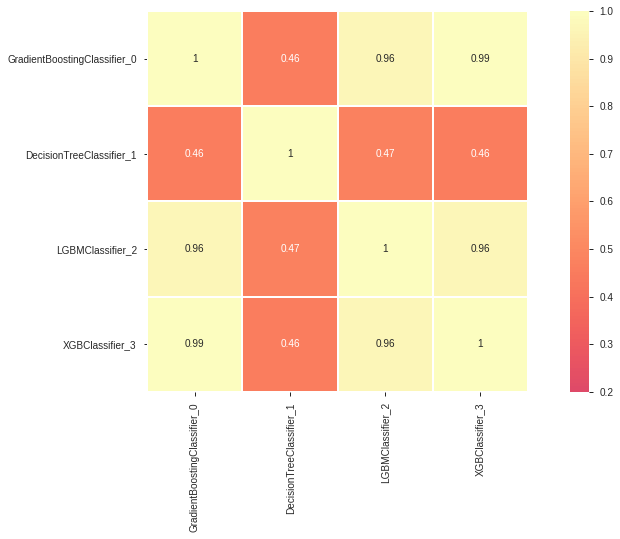

In [28]:
stack_soft_plot = stack_models([gbc,dt,lightgbm,xgboost], plot=True)

Before we wrap up this section, there is another parameter in `stack_models()` that we haven't seen yet called `restack`. This parameter controls the ability to expose the raw data to the meta model. When set to `True`, it exposes the raw data to the meta model along with all the predictions of the base level models. By default it is set to `True`.

# 10.0 Model Calibration

When performing classification you often not only want to predict the class label (outcome such as 0 or 1), but also obtain the probability of the respective outcome which provides a level of confidence on the prediction. Some models can give you poor estimates of the class probabilities and some do not even support probability prediction. Well calibrated classifiers are probabilistic and provide outputs in the form of probabilities that can be directly interpreted as a confidence level. PyCaret allows you to calibrate the probabilities of a given model through the `calibrate_model()` function. See an example below:

In [29]:
rf = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.8158  0.7495  0.3484  0.6578  0.4556  0.3571
1       0.8014  0.7123  0.3144  0.5968  0.4119  0.3059
2       0.8158  0.7723  0.3598  0.6513  0.4635  0.3633
3       0.8070  0.7146  0.3286  0.6203  0.4296  0.3265
4       0.8133  0.7141  0.3399  0.6486  0.4461  0.3467
5       0.7957  0.7486  0.3003  0.5730  0.3941  0.2853
6       0.8008  0.7074  0.3399  0.5854  0.4301  0.3195
7       0.8139  0.7466  0.3428  0.6505  0.4490  0.3497
8       0.8076  0.7245  0.3229  0.6264  0.4262  0.3245
9       0.8038  0.7306  0.2975  0.6176  0.4015  0.3010
Mean    0.8075  0.7321  0.3295  0.6228  0.4307  0.3279
SD      0.0067  0.0203  0.0195  0.0284  0.0220  0.0246

In [30]:
plot_model(rf, plot='calibration')

In [31]:
calibrated_rf = calibrate_model(rf)

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.8189  0.7676  0.2805  0.7388  0.4066  0.3243
1       0.8145  0.7802  0.2663  0.7176  0.3884  0.3052
2       0.8120  0.8092  0.2691  0.6934  0.3878  0.3013
3       0.8070  0.7501  0.2691  0.6552  0.3815  0.2901
4       0.8158  0.7544  0.2833  0.7092  0.4049  0.3189
5       0.8120  0.7761  0.2748  0.6879  0.3927  0.3050
6       0.8102  0.7561  0.2635  0.6838  0.3804  0.2934
7       0.8239  0.7848  0.2918  0.7687  0.4230  0.3430
8       0.8202  0.7565  0.2975  0.7292  0.4225  0.3376
9       0.8100  0.7733  0.2748  0.6736  0.3903  0.3007
Mean    0.8145  0.7708  0.2771  0.7057  0.3978  0.3120
SD      0.0050  0.0171  0.0106  0.0321  0.0149  0.0173

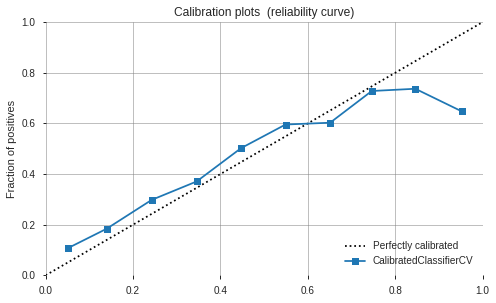

In [32]:
plot_model(calibrated_rf, plot='calibration')

Notice how different the above 2 plots look. One is before calibration and one is after. A perfectly calibrated classifier will follow the black dotted line in the above plots. Not only is `calibrated_rf` better calibrated but the `AUC` has also improved from `0.7321` to `0.7708`. By default, `calibrate_model()` uses the `sigmoid` method which corresponds to Platt's approach. The other available method is `isotonic` which is a non-parametric approach. See an example of calibration using the `isotonic` method below:  

In [33]:
calibrated_rf_isotonic = calibrate_model(rf, method = 'isotonic')

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.8189  0.7674  0.2861  0.7319  0.4114  0.3278
1       0.8158  0.7809  0.2776  0.7153  0.4000  0.3153
2       0.8158  0.8072  0.2946  0.6980  0.4143  0.3258
3       0.8102  0.7474  0.2918  0.6603  0.4047  0.3114
4       0.8177  0.7519  0.2946  0.7123  0.4168  0.3301
5       0.8114  0.7728  0.2805  0.6781  0.3968  0.3071
6       0.8120  0.7565  0.2805  0.6828  0.3976  0.3085
7       0.8246  0.7824  0.3031  0.7589  0.4332  0.3513
8       0.8202  0.7562  0.2975  0.7292  0.4225  0.3376
9       0.8113  0.7719  0.2918  0.6688  0.4063  0.3141
Mean    0.8158  0.7695  0.2898  0.7035  0.4104  0.3229
SD      0.0044  0.0170  0.0079  0.0299  0.0111  0.0135

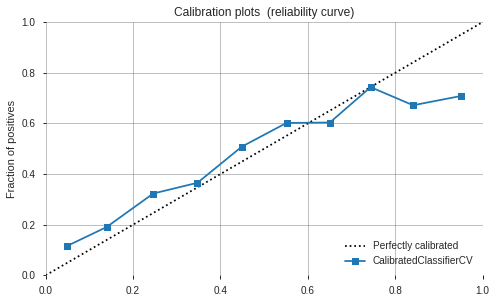

In [34]:
plot_model(calibrated_rf_isotonic, plot='calibration')

# 11.0 Predict on Test / Hold-Out Sample

In section 9.4 above we mentioned that stacking is a less commonly implemented technique of ensembling due to practical difficulties. To understand this more, let's imagine a scenario where the model deployed in production is a stacking ensembler of 4 models plus a meta model (similar to `stack_soft` created in section 9.4 above). To generate a prediction on an unseen dataset, every data point has to be predicted by all 4 models used in the stacking ensembler. All of these predictions are then passed through to the meta-model to generate a final prediction. As the size of your stacking ensembler increases, it becomes code intensive and hard to maintain for use in production.

In  __[Binary Classification Tutorial (CLF101) - Level Beginner](https://github.com/pycaret/pycaret/blob/master/Tutorials/Binary%20Classification%20Tutorial%20Level%20Beginner%20-%20%20CLF101.ipynb)__ we saw how to use a trained model to generate predictions on a test / hold-out or unseen dataset. In this example we will see it is no different to generate predictions using a stacking ensembler in PyCaret. For the purposes of illustration, we will use the `stack_soft` model created in section 10.4 above for the remaining part of this tutorial.

In [35]:
predict_model(stack_soft);

Model  Accuracy     AUC  Recall   Prec.      F1   Kappa
0  Stacking Classifier    0.8141  0.7565  0.3404  0.6527  0.4474  0.3487

The accuracy on the hold-out sample is **`0.8141`** compared with the CV results of **`0.8216`** in section 9.4 above. Note that there is a significant decline in the `AUC` on the hold-out set from the CV. We will discuss the reasons for this and and how to investigate them in our next tutorial.  __[Binary Classification Tutorial (CLF103) - Level Expert](https://github.com/pycaret/pycaret/blob/master/Tutorials/Binary%20Classification%20Tutorial%20Level%20Expert%20-%20CLF103.ipynb)__. For now we will finish the remaining part of this experiment using the stacking ensembler stored in the `stack_soft` variable.

# 12.0 Finalize Model for Deployment

In __[Binary Classification Tutorial (CLF101) - Level Beginner](https://github.com/pycaret/pycaret/blob/master/Tutorials/Binary%20Classification%20Tutorial%20Level%20Beginner%20-%20%20CLF101.ipynb)__ we learned about the purpose of `finalize_model()` and how to use it. In this tutorial we will finalize the stacking ensembler which is no different than finalizing a single model.

In [36]:
final_stack_soft = finalize_model(stack_soft)

# 13.0 Predict on Unseen Data

We will now use `final_stack_soft` to generate predictions on `data_unseen` which is the variable created at the beginning of the tutorial and contains 5% (1200 samples) of the original dataset which was never exposed to PyCaret. (see section 4 for explanations)

In [37]:
unseen_predictions = predict_model(final_stack_soft, data=data_unseen)
unseen_predictions.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0     100000    2          2         2   23      0     -1     -1      0   
1     380000    1          2         2   32     -1     -1     -1     -1   
2     200000    2          2         1   32     -1     -1     -1     -1   
3     200000    1          1         1   53      2      2      2      2   
4     240000    1          1         2   41      1     -1     -1      0   

   PAY_5  ...  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  \
0      0  ...      567.0     380.0     601.0       0.0     581.0    1687.0   
1     -1  ...    11873.0   21540.0   15138.0   24677.0   11851.0   11875.0   
2      2  ...     3151.0    5818.0      15.0    9102.0      17.0    3165.0   
3      2  ...   149531.0    6300.0    5500.0    5500.0    5500.0    5000.0   
4      0  ...     1737.0    2622.0    3301.0       0.0     360.0    1737.0   

   PAY_AMT6  default  Label   Score  
0    1542.0        0      0  0.1104  
1    8251.0        0      0  0.0538  
2    1395.0        0      0  0.1425  
3    5000.0        1      1  0.7464  
4     924.0        0      0  0.2425  

[5 rows x 26 columns]

Notice the last two columns `Label` and `Score`. `Label` is the prediction and `Score` is the probability of the prediction. The predicted results are concatenated to the original dataset while all transformations including imputation of missing values (in this case `None`), categorical encoding, feature extraction etc. are performed automatically under the hood and you do not have to manage the pipeline manually.

# 14.0 Save the experiment

In __[Binary Classification Tutorial (CLF101) - Level Beginner](https://github.com/pycaret/pycaret/blob/master/Tutorials/Binary%20Classification%20Tutorial%20Level%20Beginner%20-%20%20CLF101.ipynb)__ we learned how to save and load the model. In this experiment we will learn how to save the entire experiment including all of the outputs and models that we have built. Saving the experiment is as simple as saving the model.

In [38]:
save_experiment('Experiment_123 08Feb2020')

Experiment Succesfully Saved


# 15.0 Loading saved experiment

To load a saved experiment at a future date in the same or an alternative environment, we would use the `load_experiment()` function.

In [39]:
saved_experiment = load_experiment('Experiment_123 08Feb2020')

Object
0                     Classification Setup Config
1                                  X_training Set
2                                  y_training Set
3                                      X_test Set
4                                      y_test Set
5                         Transformation Pipeline
6                       Compare Models Score Grid
7                                   Decision Tree
8                        Decision Tree Score Grid
9                                   Decision Tree
10                       Decision Tree Score Grid
11                   Tuned RandomForestClassifier
12        Tuned RandomForestClassifier Score Grid
13                   Tuned RandomForestClassifier
14        Tuned RandomForestClassifier Score Grid
15                                  Decision Tree
16                       Decision Tree Score Grid
17                              BaggingClassifier
18                   BaggingClassifier Score Grid
19                             AdaBoostClassifier
20                  AdaBoostClassifier Score Grid
21                              BaggingClassifier
22                   BaggingClassifier Score Grid
23                        Tuned BaggingClassifier
24             Tuned BaggingClassifier Score Grid
25                              Voting Classifier
26                   Voting Classifier Score Grid
27                              Voting Classifier
28                   Voting Classifier Score Grid
29                   Gradient Boosting Classifier
30        Gradient Boosting Classifier Score Grid
31                                  Decision Tree
32                       Decision Tree Score Grid
33                Light Gradient Boosting Machine
34     Light Gradient Boosting Machine Score Grid
35                      Extreme Gradient Boosting
36           Extreme Gradient Boosting Score Grid
37                              Voting Classifier
38                   Voting Classifier Score Grid
39                              Voting Classifier
40                   Voting Classifier Score Grid
41             Stacking Classifier (Single Layer)
42  Stacking Classifier (Single Layer) Score Grid
43             Stacking Classifier (Single Layer)
44  Stacking Classifier (Single Layer) Score Grid
45             Stacking Classifier (Single Layer)
46  Stacking Classifier (Single Layer) Score Grid
47             Stacking Classifier (Single Layer)
48  Stacking Classifier (Single Layer) Score Grid
49                       Random Forest Classifier
50            Random Forest Classifier Score Grid
51                         CalibratedClassifierCV
52              CalibratedClassifierCV Score Grid
53                         CalibratedClassifierCV
54              CalibratedClassifierCV Score Grid
55             Stacking Classifier (Single Layer)
56  Stacking Classifier (Single Layer) Score Grid
57              Final [GradientBoostingClassifier

Notice that when `load_experiment()` was used, it has loaded the entire experiment and all of the intermediate outputs in the variable `saved_experiment`. You can access specific items in a similar way as you would access list elements in Python. See the example below where we access our final stacking ensembler and store it in the `final_stack_soft_loaded` variable.

In [40]:
final_stack_soft_loaded = saved_experiment[57]

In [41]:
new_prediction = predict_model(final_stack_soft_loaded, data=data_unseen)
new_prediction.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0     100000    2          2         2   23      0     -1     -1      0   
1     380000    1          2         2   32     -1     -1     -1     -1   
2     200000    2          2         1   32     -1     -1     -1     -1   
3     200000    1          1         1   53      2      2      2      2   
4     240000    1          1         2   41      1     -1     -1      0   

   PAY_5  ...  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  \
0      0  ...      567.0     380.0     601.0       0.0     581.0    1687.0   
1     -1  ...    11873.0   21540.0   15138.0   24677.0   11851.0   11875.0   
2      2  ...     3151.0    5818.0      15.0    9102.0      17.0    3165.0   
3      2  ...   149531.0    6300.0    5500.0    5500.0    5500.0    5000.0   
4      0  ...     1737.0    2622.0    3301.0       0.0     360.0    1737.0   

   PAY_AMT6  default  Label   Score  
0    1542.0        0      0  0.1104  
1    8251.0        0      0  0.0538  
2    1395.0        0      0  0.1425  
3    5000.0        1      1  0.7464  
4     924.0        0      0  0.2425  

[5 rows x 26 columns]

Notice that the results of `unseen_predictions` and `new_prediction` are identical.

# 16.0 Wrap-up / Next Steps?

We have covered a lot of new concepts in this tutorial. Most importantly we have seen how to use exploratory data analysis to customize a pipeline in `setup()` which has improved the results considerably when compared to what we saw earlier in __[Binary Classification Tutorial (CLF101) - Level Beginner](https://github.com/pycaret/pycaret/blob/master/Tutorials/Binary%20Classification%20Tutorial%20Level%20Beginner%20-%20%20CLF101.ipynb)__. We have also learned how to perform and tune ensembling in PyCaret.

There are, however, a few more advanced things to cover in `pycaret.classification` which include defining and optimizing custom cost functions, interpreting more complex tree based models using shapley values, advanced ensembling techniques such as multiple layer stacknet and more pre-processing pipeline methods. We will cover all of this in our next and final tutorial in the `pycaret.classification` series. 

See you at the next tutorial. Follow the link to __[Binary Classification Tutorial (CLF103) - Level Expert](https://github.com/pycaret/pycaret/blob/master/Tutorials/Binary%20Classification%20Tutorial%20Level%20Expert%20-%20CLF103.ipynb)__